In [6]:
import pandas as pd
data = pd.read_csv('data/Ex_CEOSalary.csv')
# df.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [7]:
data['industry'].value_counts()
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

<AxesSubplot:ylabel='industry'>

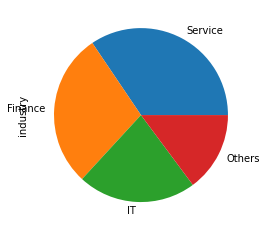

In [9]:
%matplotlib inline
data['industry'].value_counts().plot(kind='pie')

<AxesSubplot:>

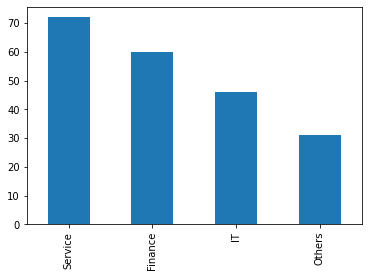

In [10]:
data['industry'].value_counts().plot(kind='bar')

In [18]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [19]:
data.skew()

C:\Users\yeoga\AppData\Local\Temp/ipykernel_30920/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [20]:
data.kurtosis()

C:\Users\yeoga\AppData\Local\Temp/ipykernel_30920/2361870383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

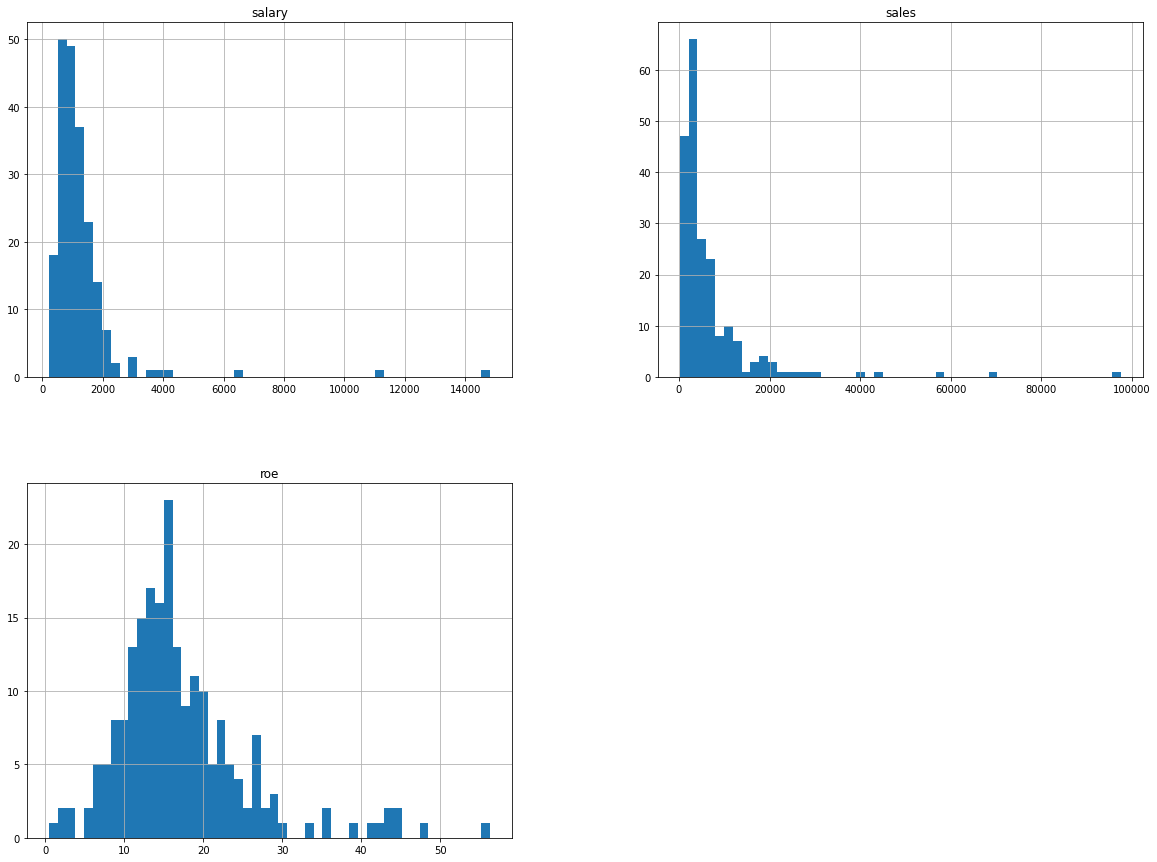

In [25]:
import matplotlib.pyplot as plt
# data.hist()
data.hist(bins=50, figsize=(20,15))

In [26]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [27]:
data.corr(method='spearman')

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [28]:
data.corr(method='kendall')

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


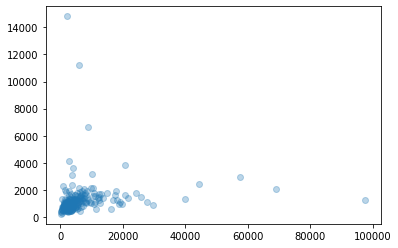

In [33]:
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha=0.3)
plt.show()

In [39]:
data.groupby('industry')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Finance,60.0,1722.416667,2242.687041,223.0,911.00,1246.0,1643.75,14822.0
IT,46.0,1344.913043,1002.813128,441.0,884.00,1119.5,1406.00,6640.0
Others,31.0,627.870968,175.264323,333.0,501.50,607.0,726.00,1100.0
Service,72.0,1153.875000,563.472032,256.0,811.25,1064.0,1348.50,3844.0


In [40]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000002E32EE30A60>, <matplotlib.lines.Line2D object at 0x000002E32EE30DF0>], 'caps': [<matplotlib.lines.Line2D object at 0x000002E32EE31180>, <matplotlib.lines.Line2D object at 0x000002E32EE31510>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002E32EE306D0>], 'medians': [<matplotlib.lines.Line2D object at 0x000002E32EE318A0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000002E32EE31C30>], 'means': []})

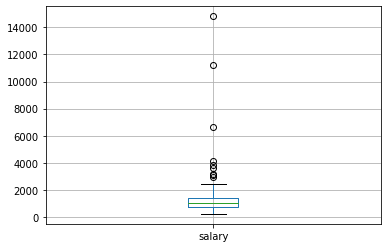

In [43]:
data.boxplot(column='salary', return_type='both')

In [48]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
IQR_salary

671.0

<AxesSubplot:>

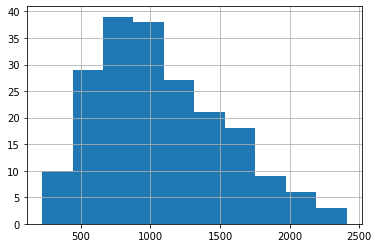

In [53]:
data_IQR = data[(data['salary']<Q3_salary+IQR_salary*1.5) & (data['salary']>Q1_salary-IQR_salary*1.5)]
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

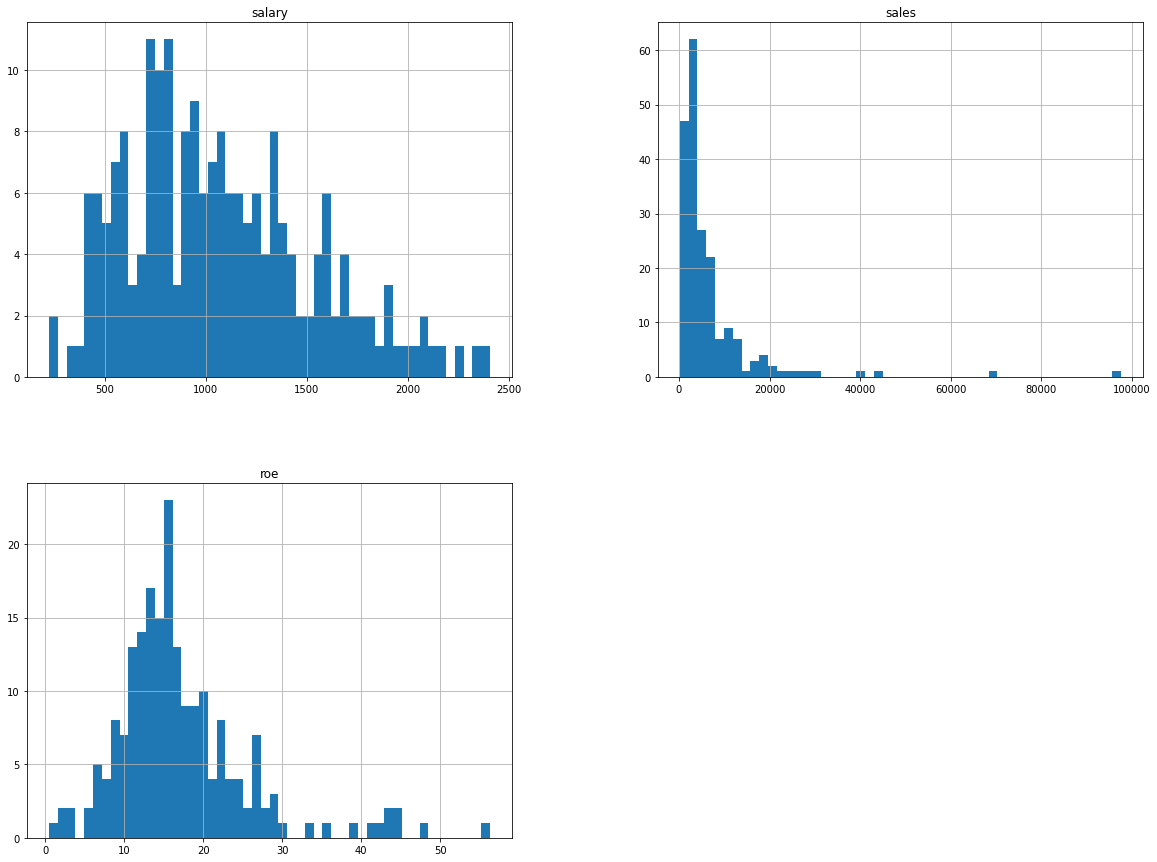

In [55]:
data_IQR.hist(bins=50, figsize=(20,15))

In [56]:
data_IQR.corr()
data_IQR.corr('spearman')
data_IQR.corr('kendall')

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000


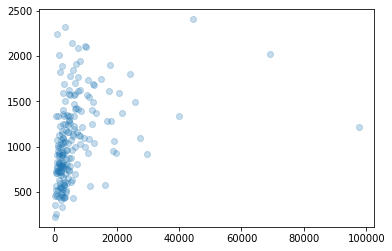

In [63]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'], data_IQR['salary'], alpha=0.25)
plt.show()

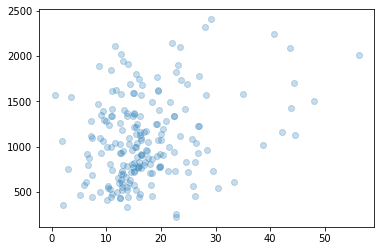

In [64]:
plt.scatter(data_IQR['roe'], data_IQR['salary'], alpha=0.25)
plt.show()

In [73]:
Q1_sales = data_IQR['sales'].quantile(0.25)
Q3_sales = data_IQR['sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
IQR_sales

4745.6000976562445

In [77]:
data_IQR2 = data_IQR[(data_IQR['sales'] < Q3_sales + IQR_sales * 1.5) & (data_IQR['sales'] > Q1_sales - IQR_sales * 1.5)]
data_IQR2.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


In [80]:
import numpy as np
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])
data.head()
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'log_salary'}>],
       [<AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>]], dtype=object)

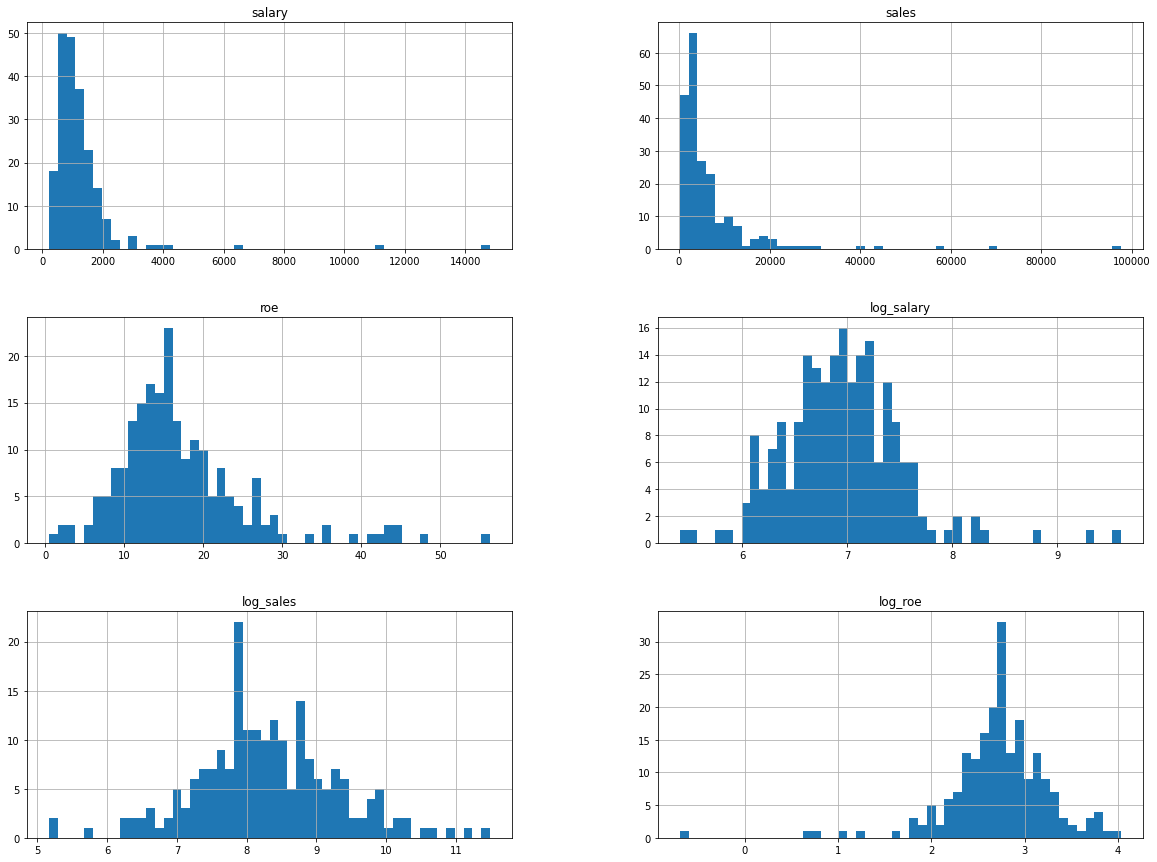

In [82]:
data.hist(bins=50, figsize=(20,15))

In [84]:
data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])
data['sqrt_roe'] = np.sqrt(data['roe'])
data.head()
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


In [85]:
import pandas as pd
data = pd.read_csv('data/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [88]:
# pd.isnull(data)
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [89]:
data['salary'].isnull().sum()

2

In [90]:
data.notnull().sum()

salary       8
sales        8
roe          9
industry    10
dtype: int64

In [95]:
data['missing'] = data.isnull().sum(1)
data

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


In [96]:
data['valid'] = data.notnull().sum(1)
data

,salary,sales,roe,industry,missing,valid
0,1095.0,27595.000000,14.100000,1,0,5
1,NaN,9958.000000,10.900000,1,1,4
2,NaN,6125.899902,23.500000,1,1,4
3,578.0,16246.000000,5.900000,1,0,5
4,1368.0,NaN,13.800000,1,1,4
5,1145.0,NaN,20.000000,2,1,4
6,1078.0,2266.699951,16.400000,2,0,5
7,1094.0,2966.800049,16.299999,2,0,5
8,1237.0,4570.200195,10.500000,2,0,5
9,833.0,2830.000000,NaN,2,1,4


In [98]:
data_del_row = data.dropna(axis=0)
data_del_row

,salary,sales,roe,industry,missing,valid
0,1095.0,27595.000000,14.100000,1,0,5
3,578.0,16246.000000,5.900000,1,0,5
6,1078.0,2266.699951,16.400000,2,0,5
7,1094.0,2966.800049,16.299999,2,0,5
8,1237.0,4570.200195,10.500000,2,0,5


In [101]:
data[['salary', 'sales', 'roe', 'industry']].dropna()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [102]:
import pandas as pd
data = pd.read_csv('data/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [104]:
data_0 = data.fillna(0)
data_0

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,0.0,9958.000000,10.900000,1
2,0.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,0.000000,13.800000,1
5,1145.0,0.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,0.000000,2


In [105]:
data_missing = data.fillna('missing')
data_missing

,salary,sales,roe,industry
0,1095.0,27595.0,14.1,1
1,missing,9958.0,10.9,1
2,missing,6125.899902,23.5,1
3,578.0,16246.0,5.9,1
4,1368.0,missing,13.8,1
5,1145.0,missing,20.0,2
6,1078.0,2266.699951,16.4,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.5,2
9,833.0,2830.0,missing,2


In [106]:
data_ffill = data.fillna(method='ffill')
data_ffill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [107]:
data_pad = data.fillna(method='pad')
data_pad

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [108]:
data_bfill = data.fillna(method='bfill')
data_bfill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [113]:
data_mean = data.fillna(data.mean())
data_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,9069.825012,13.800000,1
5,1145.0,9069.825012,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.600000,2


In [115]:
data_median = data.fillna(data.median())
data_median

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1094.5,9958.000000,10.900000,1
2,1094.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,5348.050049,13.800000,1
5,1145.0,5348.050049,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.100000,2


In [116]:
data.groupby('industry').mean()

,salary,sales,roe
industry,,,
1,1013.666667,14981.224976,13.64
2,1077.400000,3158.425049,15.80


In [118]:
fill_mean_func = lambda g: g.fillna(g.mean())
data_group_mean = data.groupby('industry').apply(fill_mean_func)
data_group_mean

salary         sales        roe  industry
industry                                                  
1        0  1095.000000  27595.000000  14.100000         1
         1  1013.666667   9958.000000  10.900000         1
         2  1013.666667   6125.899902  23.500000         1
         3   578.000000  16246.000000   5.900000         1
         4  1368.000000  14981.224975  13.800000         1
2        5  1145.000000   3158.425049  20.000000         2
         6  1078.000000   2266.699951  16.400000         2
         7  1094.000000   2966.800049  16.299999         2
         8  1237.000000   4570.200195  10.500000         2
         9   833.000000   2830.000000  15.800000         2

In [125]:
missing_fill_val = {'salary': data.salary.interpolate(), 
                   'sales': data.sales.mean(),
                    'roe': 'missing'
                   }
data_multi = data.fillna(missing_fill_val)
data_multi

,salary,sales,roe,industry
0,1095.000000,27595.000000,14.1,1
1,922.666667,9958.000000,10.9,1
2,750.333333,6125.899902,23.5,1
3,578.000000,16246.000000,5.9,1
4,1368.000000,9069.825012,13.8,1
5,1145.000000,9069.825012,20.0,2
6,1078.000000,2266.699951,16.4,2
7,1094.000000,2966.800049,16.299999,2
8,1237.000000,4570.200195,10.5,2
9,833.000000,2830.000000,missing,2


In [134]:
import pandas as pd
data = pd.read_csv('data/house_raw.csv')
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

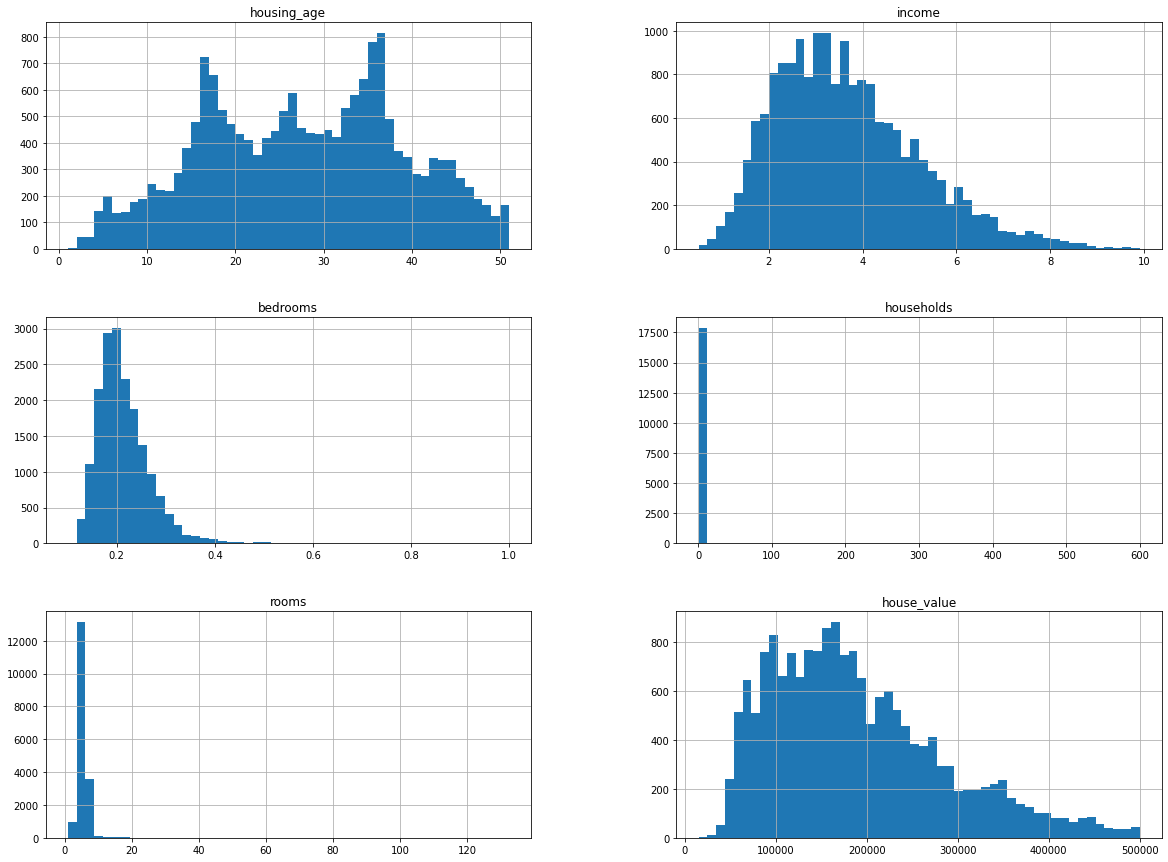

In [136]:
data.hist(bins=50, figsize=(20, 15))

<AxesSubplot:>

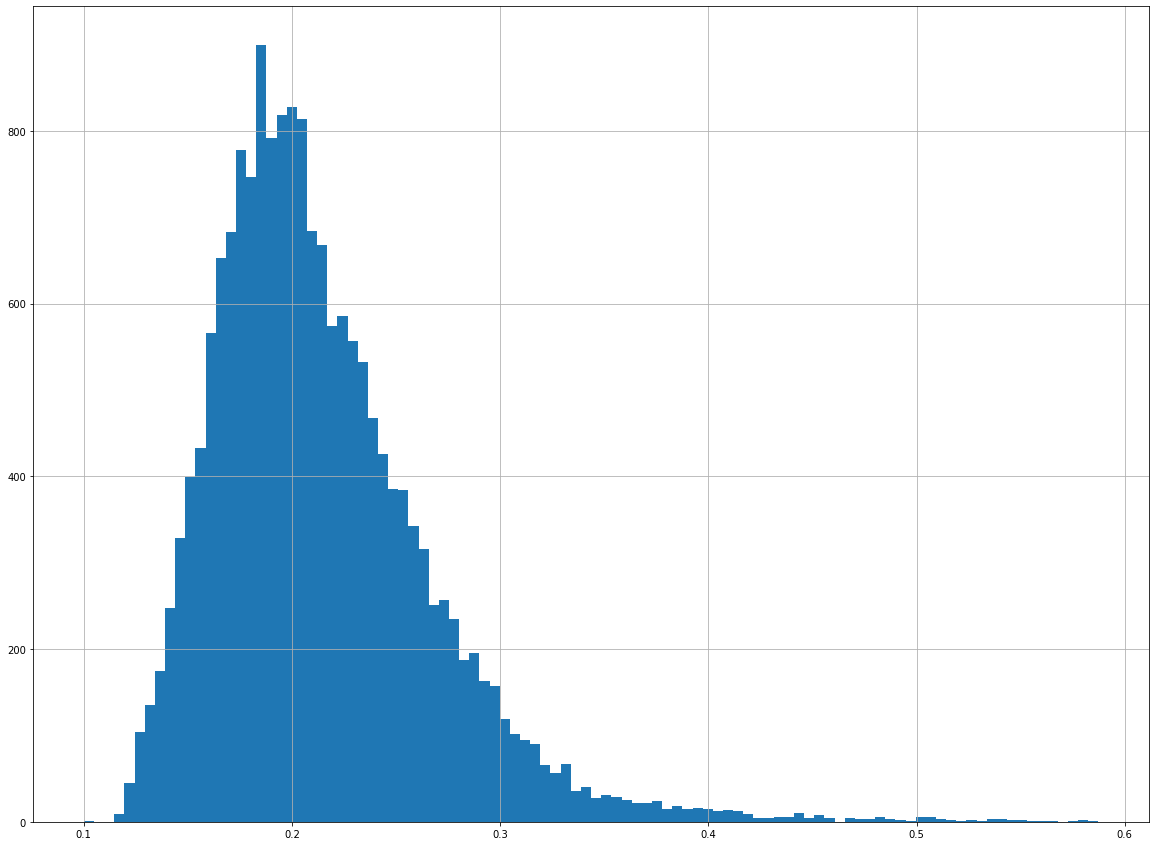

In [141]:
data_bedroom = data[data['bedrooms']< 0.6]
data_bedroom['bedrooms'].hist(bins=100, figsize= (20, 15))

In [143]:
data_bedroom2 = data[data['bedrooms']>0.6]
data_bedroom2

,housing_age,income,bedrooms,households,rooms,house_value
1732,43,1.3157,0.602489,2.133660,1.911826,333300
1911,25,1.7866,0.635258,3.566327,1.678571,325000
3162,26,1.4904,0.658869,3.750779,1.598131,275000
3165,12,1.2012,0.613084,3.271233,1.465753,275000
5446,24,1.8304,0.662539,3.973545,1.708995,225000
7674,45,1.4940,0.625887,3.673981,1.768025,187500
7677,20,1.0938,0.923077,1.739130,1.130435,187500
9658,46,2.8750,1.000000,1.846154,0.846154,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11810,37,2.7634,0.700000,4.524194,1.411290,137500


<AxesSubplot:>

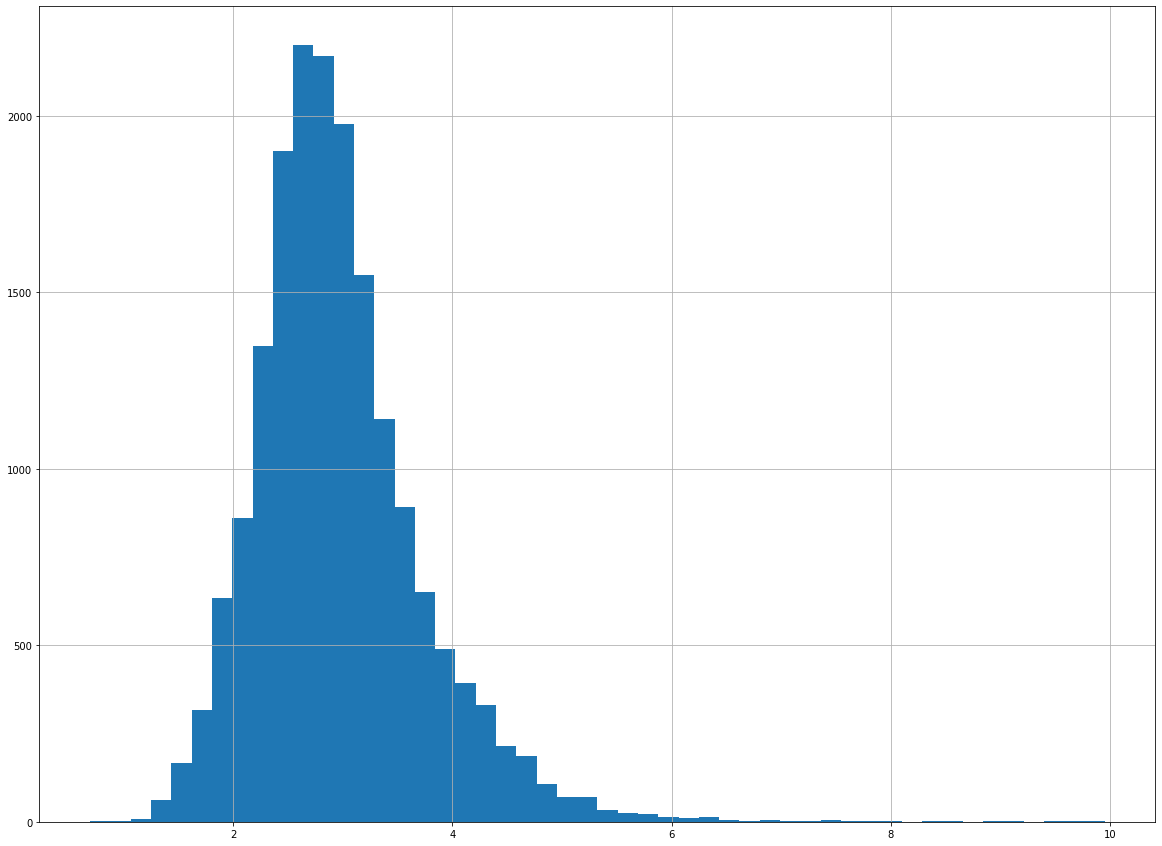

In [148]:
data_households = data[data['households']<10]
data_households['households'].hist(bins=50, figsize=(20,15))

<AxesSubplot:>

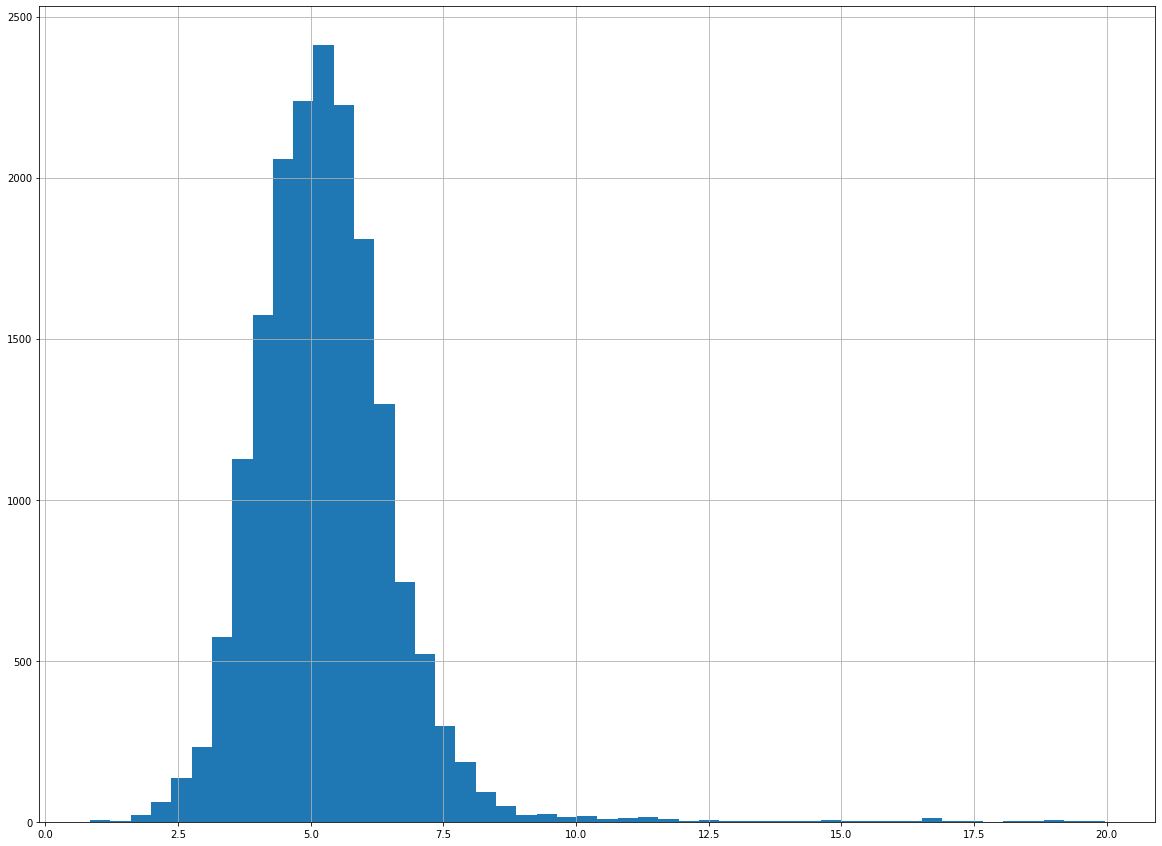

In [151]:
data_rooms = data[data['rooms']<20]
data_rooms['rooms'].hist(bins=50, figsize=(20,15))

In [159]:
new_data = data[(data['bedrooms'] < 0.5) & (data['households'] < 7) & (data['rooms'] < 12)]
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

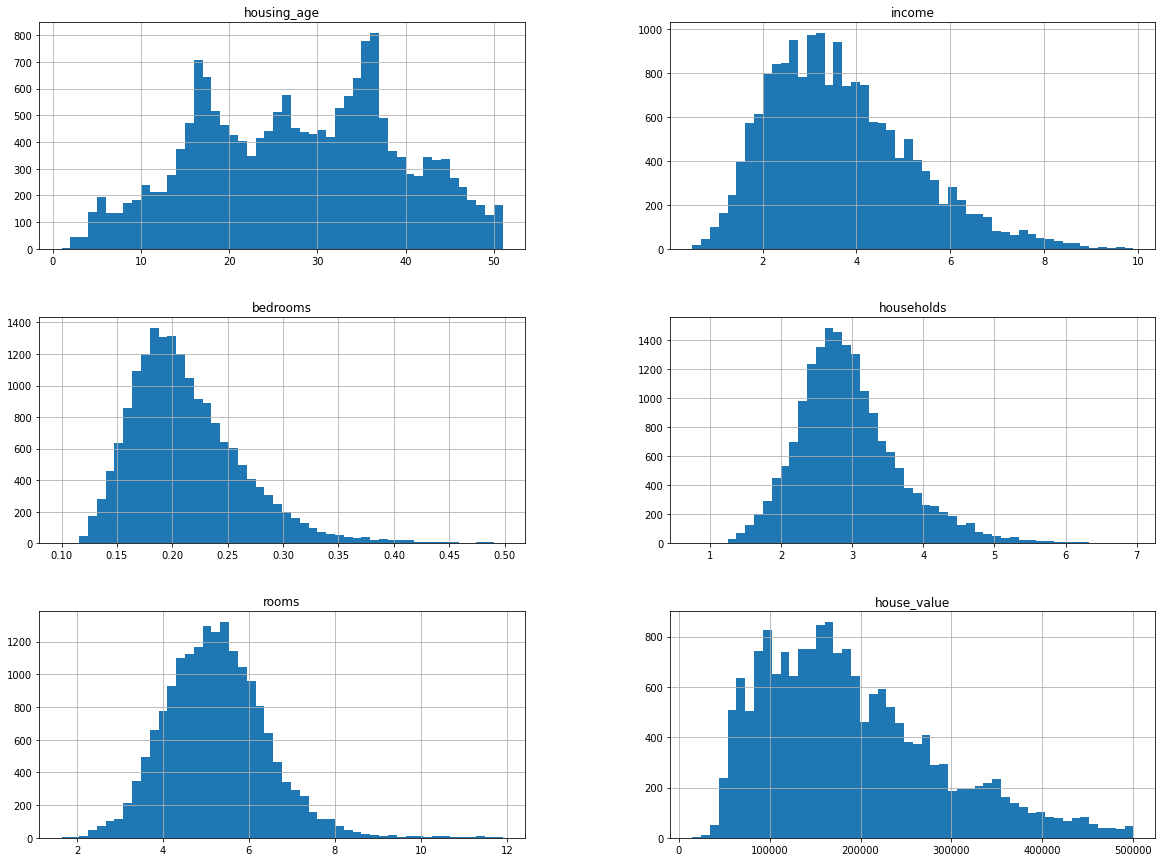

In [160]:
new_data.hist(bins=50, figsize=(20,15))

In [177]:
# 특성데이터셋, 레이블 데이터셋 나누기
X = new_data[new_data.columns[0:5]]
y = new_data[["house_value"]]

# 학습용 데이터(train)와 테스트용 데이터(test) 구분을 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 데이터 정규화(min-max)
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

# 훈련데이터 및 테스트데이터 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

# 선형 모델 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

# 훈련데이터의 정확도(R-squared 설명력) 확인
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

# 테스트데이터의 정확도(R-squared 설명력) 확인
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.5826083517811866

In [179]:
new_data.to_csv('data/new_house_price.csv', index=False)